# Principal Component Analysis (PCA) on MNIST

In this notebook, we get an understanding of **PCA** using the familiar MNIST data set of handwritten digits.

PCA is an unsupervised linear transformation technique that is prominently for dimensionality reduction. Other applications include exploratory data analyses and de-noising of signals. PCA can identify patterns in data based on the correlation between features. It aims to find the directions of maximum variance in the original high-dimensional space and projects data onto these new directions in a lower-dimensional space.

``Note: PCA is highly sensitive to scaling. Make sure all features are in the same scale. **Sklearn.preprocessing** has options for scaling data.``

Before looking at the PCA algorithm for dimensionality reduction in more detail, let's summarize the approach:
1. Standardize the ``d`` dimensional dataset
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues
4. Select ``k`` eigenvectors that correspond to the ``k`` largest eigenvalues, where ``k`` is the dimensionality of the new feature subspace ``(k ≤ d)``
5. Construct a projection matrix ``U`` from the top ``k`` eigenvectors
6. Transform the ``d`` dimensional input dataset ``X`` using the projection matrix ``U`` to obtain the new ``k`` dimensional feature subspace

## Load MNIST data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.load('train_data.npy')

## Statistics of the data

Principal component analysis chooses projection directions based on the **covariance matrix** of the data. 
* The ``ith`` **eigenvalue** of the covariance matrix is the variance in the direction of the ``ith`` eigenvector.

We begin by computing the eigenvalues and eigenvectors of the covariance matrix. The routine `numpy.linalg.eigh` returns these in order of increasing eigenvalue. The eigenvectors are normalized to unit length and returned as columns of a matrix.

In [4]:
import numpy as np
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat) # to obtain the eigenpairs

print('Total Eigenvalues: \n%s' % eigen_vals.shape[0])
print('\nEigenvalues sample: \n%s' % eigen_vals[0:4])

Total Eigenvalues: 
784

Eigenvalues sample: 
[-4.84520703e-11 -3.85873996e-11 -3.12429594e-11 -2.35968339e-11]


Since we want to reduce the dimensionality of our dataset, we only select the few eigenvectors (principal components) that contains most of the information (variance). Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude. 
* We are interested in the top ``k`` eigenvectors based on the values of their corresponding eigenvalues. 

``The variance explained ratio of an eigenvalue is simply the fraction of an eigenvalue and the total sum of the eigenvalues.``

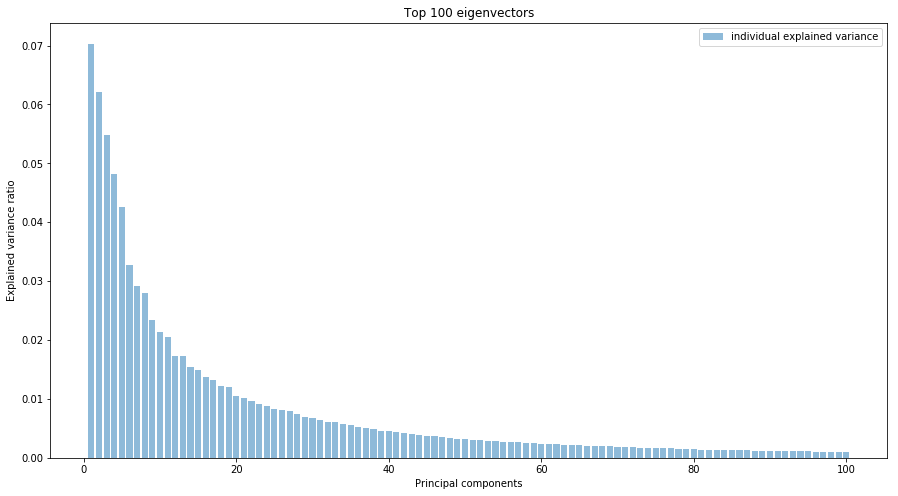

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
n = 101

import matplotlib.pyplot as plt
plt.bar(range(1,n), var_exp[1:n], alpha=0.5, align='center', label='individual explained variance')
#plt.step(range(1,785), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title("Top %i eigenvectors" %(n-1))

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.show()

The resulting plot indicates that the first 10 principal components combined accounts for almost 40 percent of the variance. Also, we can see that the first principal component explains 7 percent of the variance in the data. **To put things into perspective, it takes 784 principal components to account for 100 percent of variance.**

## Projection and reconstruction

We now get a more *visual* feel for what information is lost during dimensionality reduction.

Suppose we find the PCA projection to `k` dimensions. The results are plotted for:
* Starting with a handwritten digit in the original (784-dimensional) space
* *Projecting* it down to `k` dimensions
* *Reconstructing* an image in 784-dimensional space from this `k`-dimensional projection?

Let `U` be the 784-by-`k` matrix whose columns are the top `k` eigenvectors. Then:
* The matrix `transpose(U)` performs the PCA projection onto the top `k` directions
* The matrix `U` reconstructs a point in the original space from its `k` dimensional projection

Thus the product `U*transpose(U)` is a 784-by-784 matrix that does a *projection-followed-by-reconstruction*. The following function returns this matrix for any specified `k`.

In [7]:
# Function that returns the project-and-reconstruct operations as a single matrix
def projection_and_reconstruction(k):
    U = eigen_vecs[:,(784-k):784]
    P = np.dot(U,U.T)
    return P

This next routine displays an handwritten digit image given as a 784-dimensional vector. It begins by clipping each entry to lie in the range ``[0, 255]``; the images returned after PCA reconstruction might not satisfy this property.

In [8]:
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

We finally get to our main visualization code block. It displays the original image as well as the reconstructions after projecting to each of the specified dimensions using PCA. Let's try it out on the ``1000 th`` data point.

Original Image:


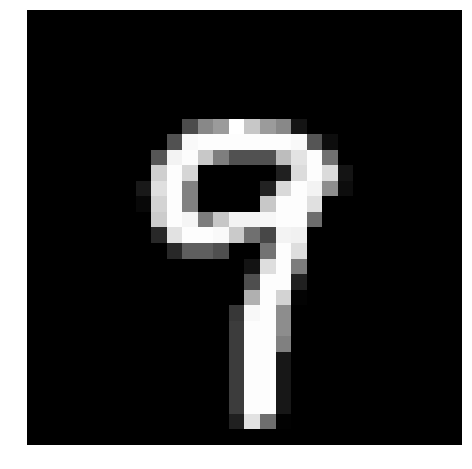

Projection to dimension  400


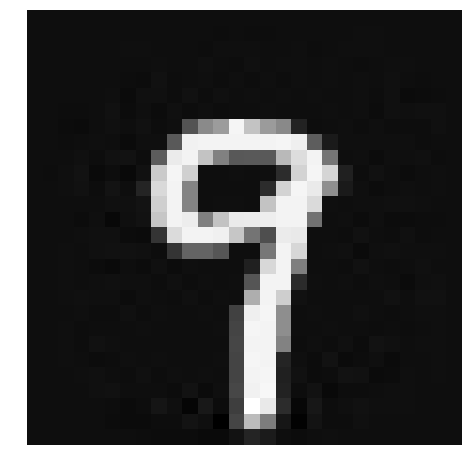

Projection to dimension  300


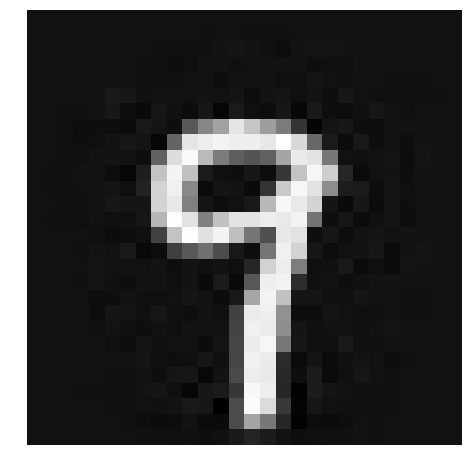

Projection to dimension  200


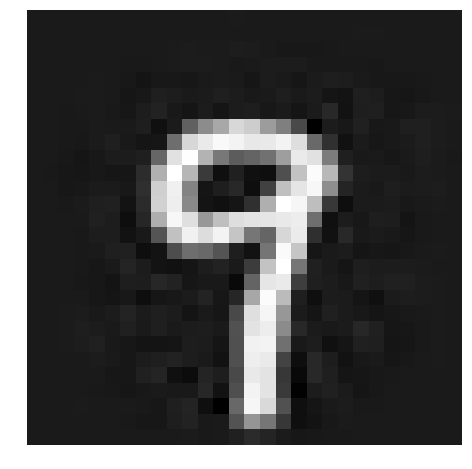

Projection to dimension  100


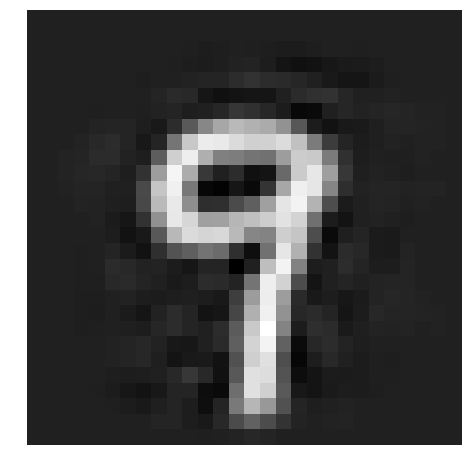

Projection to dimension  50


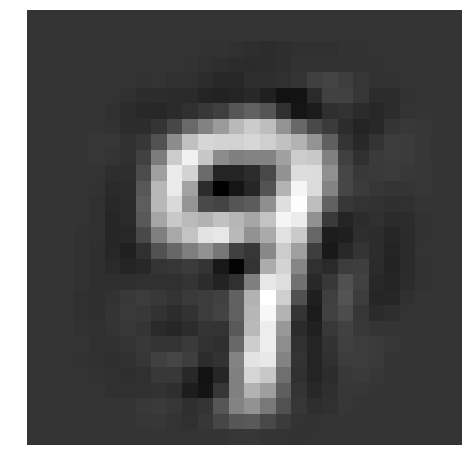

In [13]:
index = 1000
x = X_train[index]
k_list = [400, 300, 200, 100, 50]

print "Original Image:"
show_digit(x)

for k in k_list:
    print "Projection to dimension ", k
    P = projection_and_reconstruction(k)
    show_digit(P.dot(x))

Reducing the dimensions from 784 to 300 still retains the information decently.